# Fitting a model on data of Coronavirus infections

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lmfit
from scipy.optimize import curve_fit

%matplotlib inline

In [44]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
df = pd.read_csv(url)
df = df.rename(columns={'Province/State' : 'Province', 
                   'Country/Region' : 'Region'})
df = df.drop(columns=['Lat', 'Long'])
df.head()

,Province,Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,NaN,Thailand,2,3,5,7,8,8,14,14,...,43,43,43,47,48,50,50,50,53,59
1,NaN,Japan,2,1,2,2,4,4,7,7,...,274,293,331,360,420,461,502,511,581,639
2,NaN,Singapore,0,1,3,3,4,5,7,7,...,108,110,110,117,130,138,150,150,160,178
3,NaN,Nepal,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,0,0,0,3,4,4,4,7,...,29,36,50,50,83,93,99,117,129,149


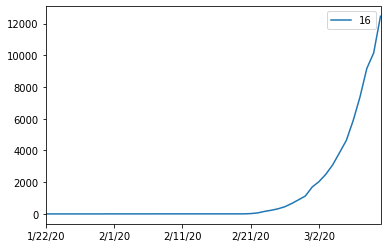

In [267]:
ita = df.loc[df.Region == 'Italy']
ita = ita.drop(columns=['Province', 'Region'])
ita = ita.T

ita.plot()

It could be useful to consider only data from when the contagion started in Italy.

In [247]:
ita.columns = ['Infected']
ita_from_contagion = ita.loc[ita.Infected > 0]
ita_from_contagion.plot()

Or from when the exponential growth started 

In [248]:
min_exp = np.array([x for x in range(18,len(ita)) if ita.Infected[x]-ita.Infected[x-1] > ita.Infected[x-1]-ita.Infected[x-2]]).min()
ita_from_exp_spread = ita.iloc[min_exp:]
ita_from_exp_spread.plot()

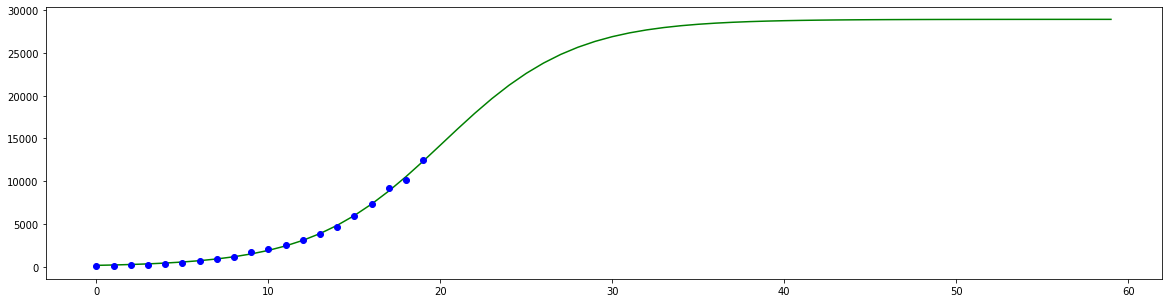

In [266]:
def logistic(x, sup, g_rate, cen):
    return sup/(1+np.exp(-g_rate*(x-cen)))

guess = [44000, 0.15, 30]
sup, g_rate, cen = guess

x = [i for i in range(len(ita_from_exp_spread))]
x_triple = [i for i in range(3*len(ita_from_exp_spread))]
x_date = ita_from_exp_spread.index
data = ita_from_exp_spread.Infected.values

param, cov = curve_fit(logistic, x, data, guess)
sup, g_rate, cen = param

z = [logistic(i, sup, g_rate, cen) for i in x_triple]

fig = plt.figure(1, figsize = (20,5))
chart = fig.add_subplot(111)
chart.plot(x_triple, z, 'g')
chart.plot(x, data, 'bo')

plt.show()